In [3]:
using Revise
using PottsProductionScheduling, PyPlot, Statistics

┌ Info: Precompiling PottsProductionScheduling [14e5a3a8-54b3-48e7-a2dc-d9c858be7609]
└ @ Base loading.jl:1317


# BENCHMARK: How many machines can we deal with?

In [48]:
T = 100
M = 1:5
N = 5

5

In [49]:
computing_times = zeros(length(M))
for i in 1:length(M)
    println(i,"/", length(M))
    A =ones(M[i], T, N, N)
    J = 0.5*ones(M[i], M[i], T, N, N)
    h = 3.0*rand(T,N)
    env = Environment(T, M[i], N, h, A, J);
    computing_times[i] = @elapsed optimize(env)
end

1/5
2/5
3/5
4/5
5/5


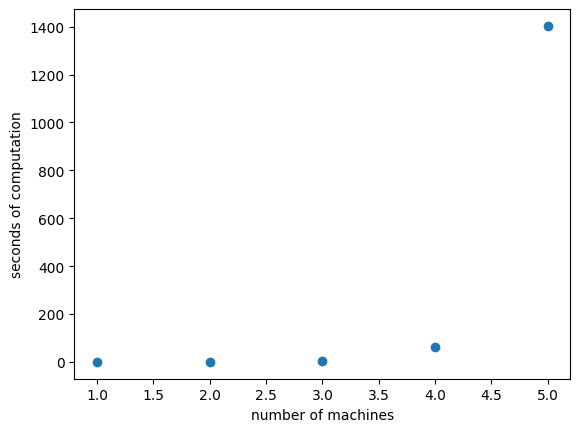

PyObject Text(24.0, 0.5, 'seconds of computation')

In [54]:
plot(M, computing_times, marker="o", linestyle="none")
xlabel("number of machines")
ylabel("seconds of computation")

# CHECK: Random strategy

In [48]:
T = 100
M = 3
N = 5
n_random_samples = 10
A =ones(M, T, N, N)
J = 0.5*ones(M, M, T, N, N)
h = 3.0*rand(T,N)
env = Environment(T, M, N, h, A, J);

In [54]:
optimal_cost, _ = optimize(env);

In [52]:
random_costs = zeros(n_random_samples)
for i in 1:n_random_samples
    σrandom = rand(1:N, T, M)
    random_agent = Agent(σrandom, N)
    random_costs[i] = cost(env, random_agent)
end

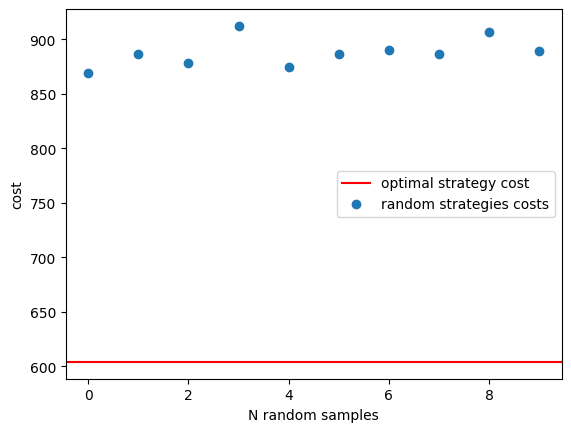

PyObject Text(24.000000000000007, 0.5, 'cost')

In [58]:
axhline(optimal_cost, color="red")
plot(random_costs, marker="o", linestyle="none")
legend(["optimal strategy cost", "random strategies costs"])
xlabel("N random samples")
ylabel("cost")